# Data analysis of iris

### Duy Tinh Nguyen (Mr.)
### Corporate-Based Email: tinh.nguyen9@hcmut.edu.vn
### Personal Email: jingnguyen10@gmail.com

## Support libraries and functions

In [110]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns

In [66]:
def ans(msg, indent=1, width=None, title=None):
    msg = " ANSWER: " + str(msg) + "  "
    lines = msg.split('\n')
    space = " " * indent
    if not width:
        width = max(map(len, lines))
    box = f'╔{"═" * (width + indent * 2)}╗\n'
    if title:
        box += f'║{space}{title:<{width}}{space}║\n'  # title
        box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  # underscore
    box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
    box += f'╚{"═" * (width + indent * 2)}╝'  # lower_border
    print("\n"+box)

## [Problem 1] Data acquisition

In [67]:

data = load_iris()
x = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
x.columns = [data.feature_names]
y.columns = ['Species']

## Values of variable x:

In [68]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Values of variable y:

In [69]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## [Problem 2] Combining data

In [70]:
len(df.columns)

5

In [71]:
df = x.copy()
df.insert(len(df.columns),y.columns[0], y)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## [Problem 3] Checking the data

### Display the 4th sample from the beginning and see what each feature is like

In [72]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


### Output the total number of samples for each label.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (sepal length (cm),)  150 non-null    float64
 1   (sepal width (cm),)   150 non-null    float64
 2   (petal length (cm),)  150 non-null    float64
 3   (petal width (cm),)   150 non-null    float64
 4   (Species,)            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Check if there is a missing value in the feature quantity.

In [74]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

> Comment: There is no missing value

### Display the mean, standard deviation, and quartiles of the feature values at once.


In [75]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## [Problem 4] Examining the iris dataset itself

> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

## [Problem 5] Extracting the required data

### Extractsepal_width, columns in three different ways

In [97]:
df.iloc[:, 1].to_frame()

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [92]:
df.loc[:, df.columns[1]].to_frame()

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [94]:
df[df.columns[1]].to_frame()

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


### Extract the 50th to 99th data​

In [99]:
df.iloc[50:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


### Extract the 50th to 99th data of thepetal_lengthcolumn

In [103]:
df.loc[50:100, df.columns[2]].to_frame()

,petal length (cm)
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


### Extract data with a petal_width value of 0.2​

In [108]:
df[df.loc[:, df.columns[3]] == 0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


> Comment: .loc command is label-based while .iloc command is integer position-based

## [Problem 6] Creating a diagram

### Make a pie chart of the number of samples per label (while showing percentages)

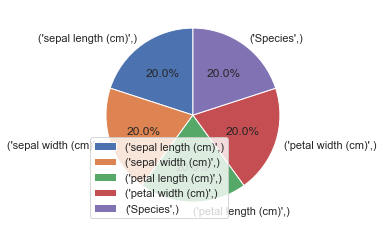

In [111]:
sns.set()
sns.set_theme(style = "whitegrid")
plt.pie(df.count(), labels = df.columns, startangle = 90, autopct = '%1.1f%%')
plt.legend(loc = 0)
plt.show()

### Select features one by one and visualize the distribution of data for each label using a box plot

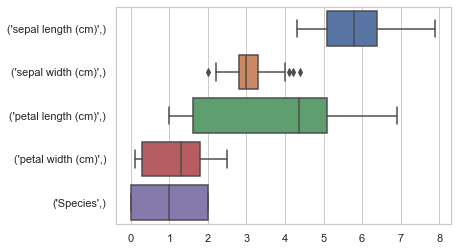

In [112]:
sns.boxplot(data = df, orient = "h")
plt.show()

### Select features one by one and visualize the distribution of data for each label using a violin plot

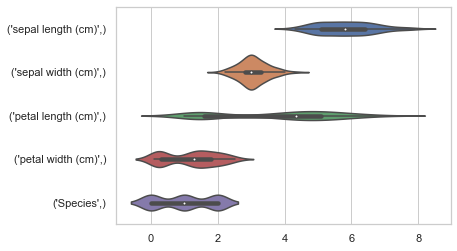

In [113]:
sns.violinplot(data = df, orient = "h")
plt.show()

### Comparision
 > Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator

> Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

### Box plots advantages
> - Summarizes variation in large datasets visually
> - Shows outliers
> - Compares multiple distributions
> - Indicates symmetry and skewness to a degree

### Violin plots advantages

> Advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data

## [Problem 7] Confirming the relationship between features

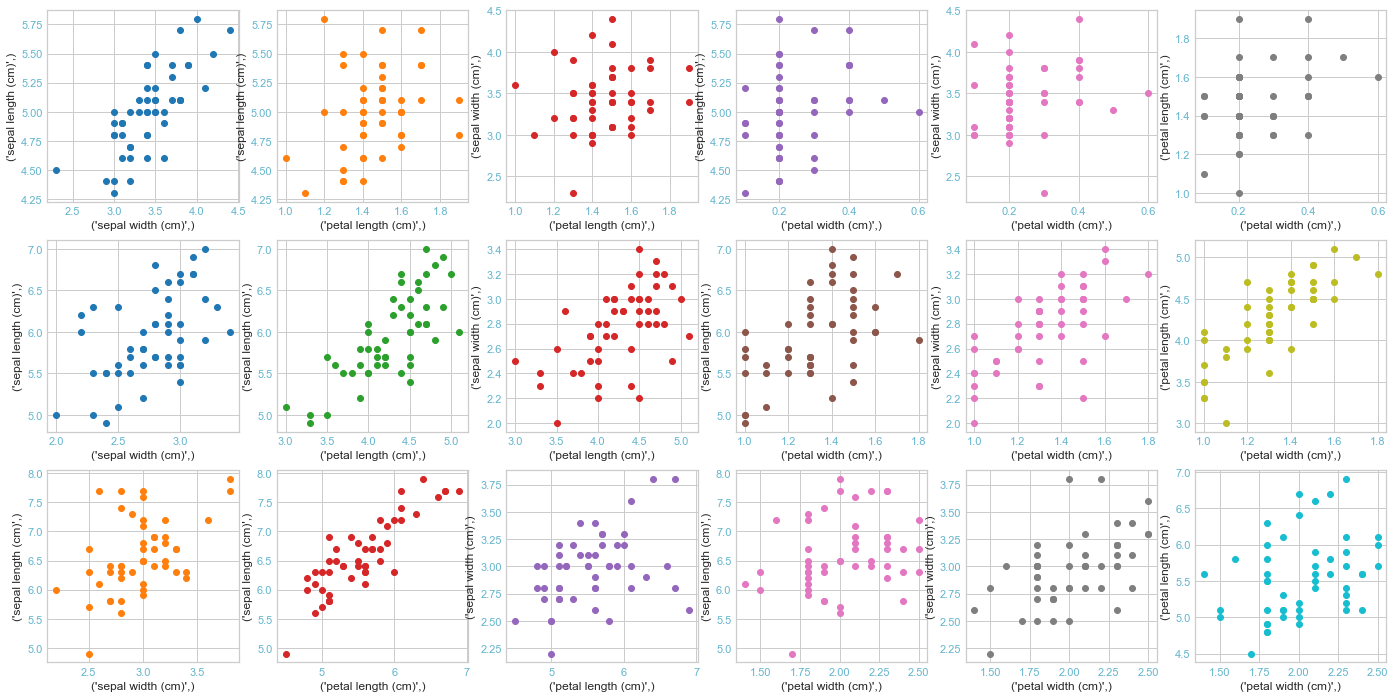

In [114]:
features = 4
species = 3
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
fig, axs = plt.subplots(species, features + 2, figsize = (24, 12))
for i in range(species):
  for j in range(features):
    for k in range(j):
      l = j + k if j == 3 else j + k - 1
      axs[i, l].set_xlabel("{}".format(df.columns[j]))
      axs[i, l].set_ylabel("{}".format(df.columns[k]))
      axs[i, l].tick_params(direction = 'out', length = 1, width = 1, colors = 'c')
      axs[i, l].scatter(df[df.iloc[:, 4] == i].iloc[:, j], df[df.iloc[:, 4] == i].iloc[:, k], color = colors[i + l*2])
plt.show()

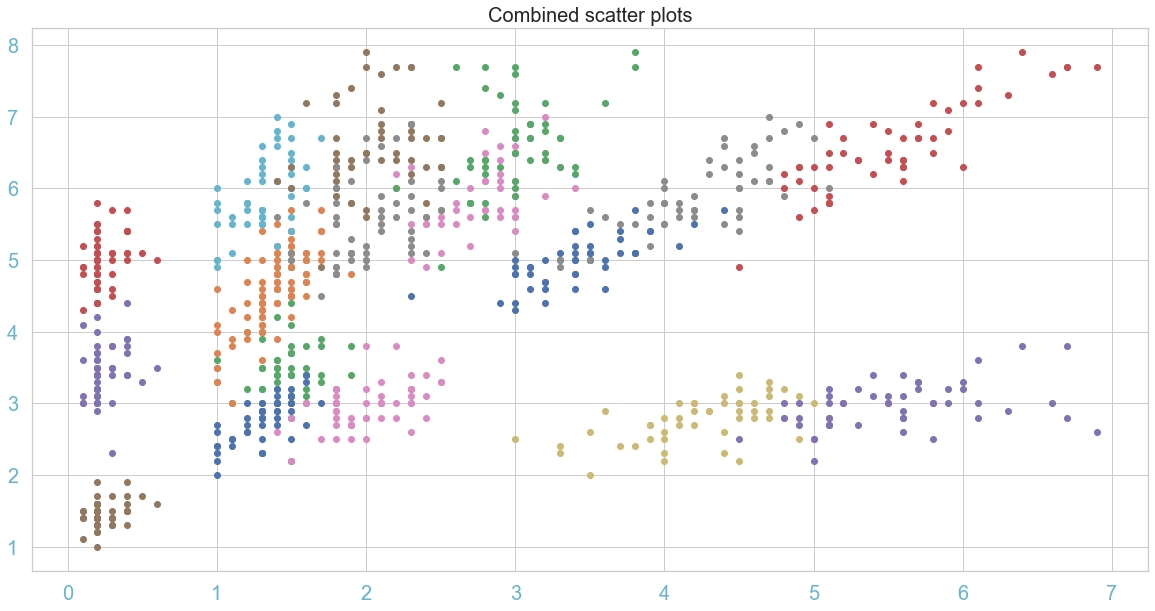

In [115]:
plt.figure(figsize = (20, 10))
for i in range(species):
  for j in range(features):
    for k in range(j):
      l = j + k if j == 3 else j + k - 1
      plt.scatter(df[df.iloc[:, 4] == i].iloc[:, j], df[df.iloc[:, 4] == i].iloc[:, k])
plt.tick_params(direction = 'out', length = 10, width = 1, colors = 'c', labelsize = 20)
plt.title('Combined scatter plots', fontsize = 20)
plt.show()

### Create a correlation coefficient matrix for 4 features

In [116]:
corr = pd.DataFrame.corr(df.iloc[:, :-1])
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Make a heat map of the correlation coefficient matrix (1)

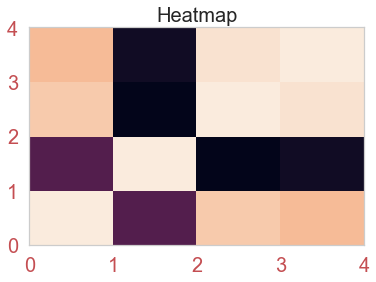

In [117]:
plt.title("Heatmap", fontsize = 20)
plt.tick_params(direction = 'out', length = 1, width = 1, pad = 10, labelsize = 20, colors = 'r')
plt.pcolor(corr)
plt.show()

## [Problem 8] Explaining the results of visualized graphs and tables

> The setosa species have the smallest differences among many samples while the virginica have the largest variance. Moreover, setosa is the smallest species with the smallest sepal length, petal length and petal width. However, they have the largest sepal width. Besides, virginica has the biggest sepal length, petal length and petal width and being the largest species among those three.